In [ ]:
# !pip install azure-cognitiveservices-vision-customvision

In [1]:
from GlobalVariables import PREDICTION_KEY, END_POINT, PROJECT_ID, ITERATION
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials

In [2]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [11]:
url = 'https://www.wigglestatic.com/product-media/106046465/126641.999.10.00_9.jpg?w=430&h=430&a=7'
## url = 'https://www.aljazeera.com/wp-content/uploads/2020/07/0d6c9c64010e4fa78cfd6e1f612ff539_18.jpeg?resize=770%2C513'

In [12]:
image = Image.open(requests.get(url, stream=True).raw)

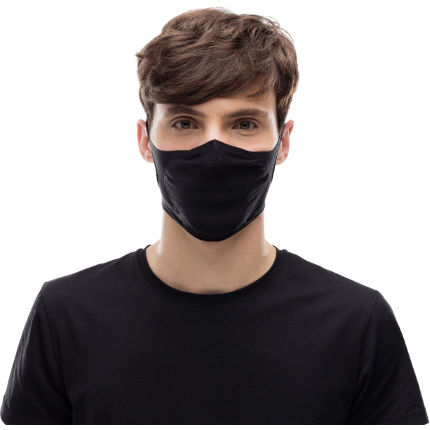

In [13]:
image

In [14]:
credentials = ApiKeyCredentials(in_headers={'Prediction-key': PREDICTION_KEY})

predictor = CustomVisionPredictionClient(
    endpoint=END_POINT,
    credentials=credentials
    )

In [15]:
results = predictor.detect_image_url(
    project_id=PROJECT_ID,
    published_name=ITERATION,
    url=url
    )

In [16]:
dir(results )

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attribute_map',
 '_classify',
 '_create_xml_node',
 '_flatten_subtype',
 '_get_rest_key_parts',
 '_infer_class_models',
 '_subtype_map',
 '_validation',
 'additional_properties',
 'as_dict',
 'created',
 'deserialize',
 'enable_additional_properties_sending',
 'from_dict',
 'id',
 'is_xml_model',
 'iteration',
 'predictions',
 'project',
 'serialize',
 'validate']

In [17]:
def add_boxes_to_image(image, predictions):
    for prediction in predictions:
        if prediction.probability > 0.5:

            # print object name
            print(prediction.tag_name)

            # print probability 
            print(prediction.probability)

            # set rectangle size
            x = prediction.bounding_box.left * image.size[0]
            y = prediction.bounding_box.top * image.size[1]
            width = prediction.bounding_box.width * image.size[0]
            height = prediction.bounding_box.height * image.size[1]
 
            # create subplot
            figure, ax = plt.subplots(1)
            ax.axis('off')

            # create rectangle
            rect = patches.Rectangle((x,y), width, height, edgecolor='r', facecolor="none")
            ax.imshow(image)
            ax.add_patch(rect)

            plt.show()

mask
0.9997563


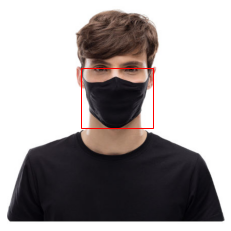

person
0.9893126


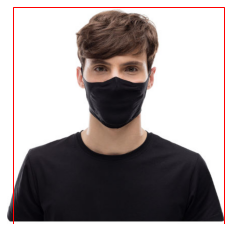

In [18]:
add_boxes_to_image(image, results.predictions)